In [4]:
suppressPackageStartupMessages(library(dplyr))
library(ggplot2)
suppressPackageStartupMessages(library(Seurat))
library(pheatmap)
library(RColorBrewer)
library(harmony)
source("/projects/ps-renlab2/y2xie/scripts/basics.R")
source("/projects/ps-renlab2/y2xie/scripts/DPT_help.R")
source("/projects/ps-renlab2/y2xie/scripts/hicat_vg.R")
source("/projects/ps-renlab2/y2xie/scripts/hicat_doubletfinder_mo.R")

### this is just to resize jupyter notebook plot size
library(repr)

Warning message:
“package ‘pheatmap’ was built under R version 4.3.2”
Warning message:
“package ‘harmony’ was built under R version 4.3.2”
Loading required package: Rcpp

Warning message:
“package ‘dichromat’ was built under R version 4.3.2”
Warning message:
“package ‘viridis’ was built under R version 4.3.2”
Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [1]:
getwd()

[1] "/mnt/tscc2/y2xie/projects/BICAN/analysis/04.clustering"

## Load l2 clustering results for manual check

In [7]:
mmg_list <- list()
for (file in list.files("02.RNA/01.l1_clustering/", pattern = "^MiniAtlas_RNA_merged_cortex_240318_([^_]+).qs")){
    fname <- gsub("^MiniAtlas_RNA_merged_cortex_240318_([^_]+).qs$", "\\1", file)
    mmg_list[[fname]] <- qs::qread(paste0("02.RNA/01.l1_clustering/", file))
}

In [12]:
mmg_list
# 105862 + 279486 + 247013
113148 + 304849 + 240443

$GABA
An object of class Seurat 
36601 features across 111549 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

$Glut
An object of class Seurat 
36601 features across 303131 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

$NonN
An object of class Seurat 
36601 features across 237621 samples within 1 assay 
Active assay: RNA (36601 features, 2438 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap


[1] 632361

[1] 658440

## Visualize doublet score to identify doublet clusters

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


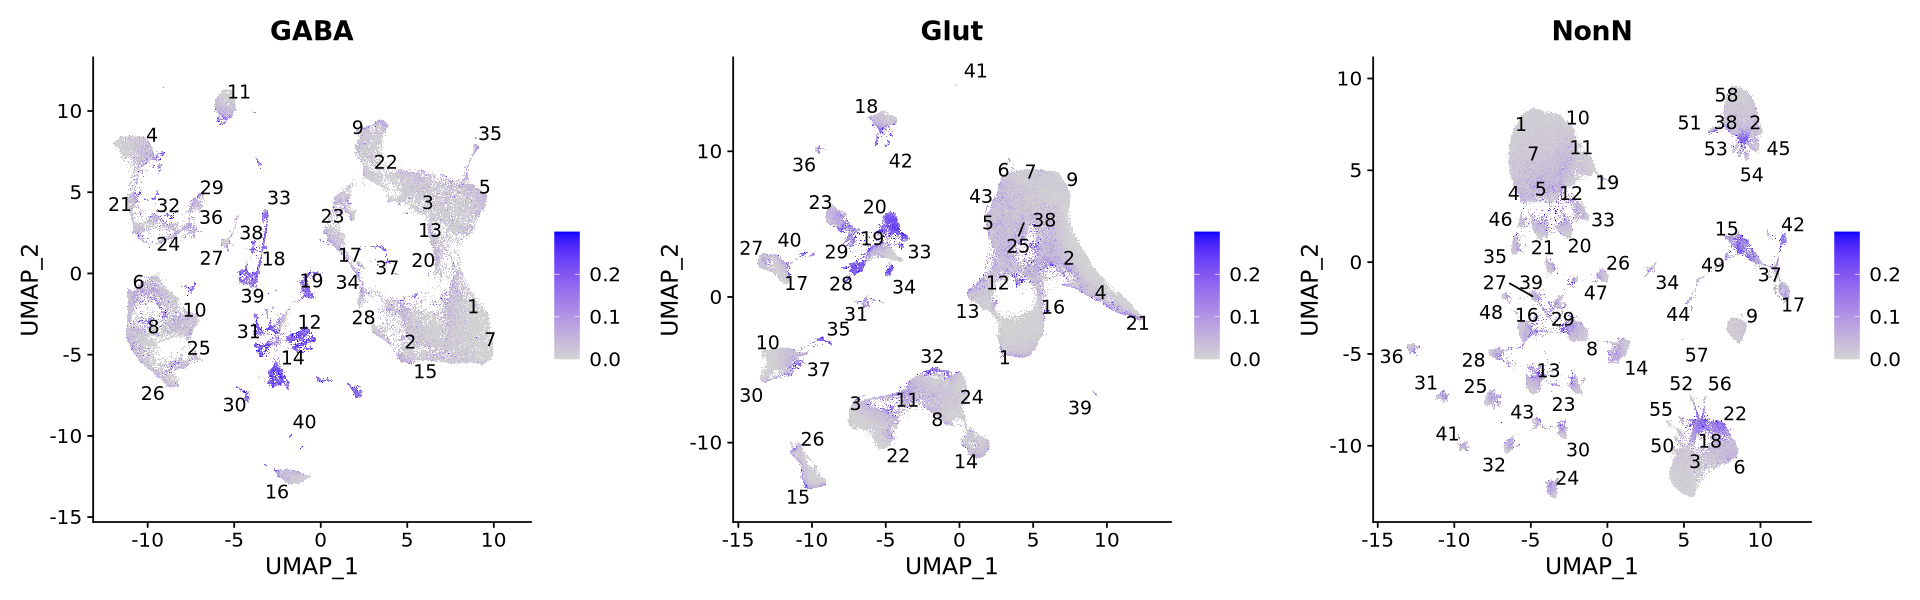

In [9]:
plist <- list()
for (i in 1:length(mmg_list)){
    tmp <- mmg_list[[i]]
    title <- names(mmg_list)[i]
    plist[[i]] <- FeaturePlot(tmp, "doublet_score", label = T, repel = T) + ggtitle(title)
}

options(repr.plot.width = 16, repr.plot.height = 5)
do.call(cowplot::plot_grid, c(plist, ncol = length(plist)))

Warning message in `!=.default`(seurat_clusters, blist[[i]]$seurat_clusters):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(seurat_clusters, blist[[i]]$seurat_clusters):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(seurat_clusters, blist[[i]]$seurat_clusters):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


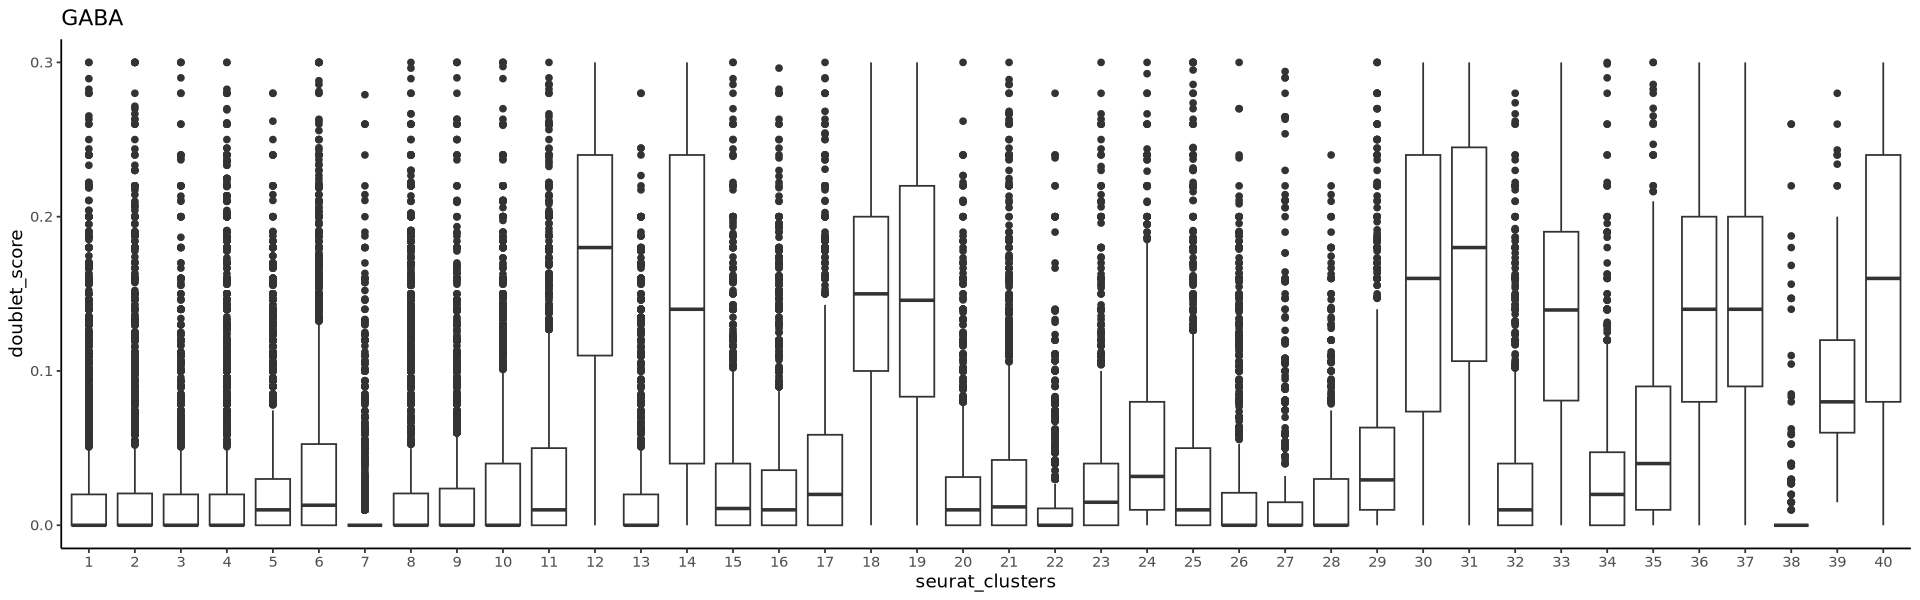

[[1]]

[[2]]

[[3]]


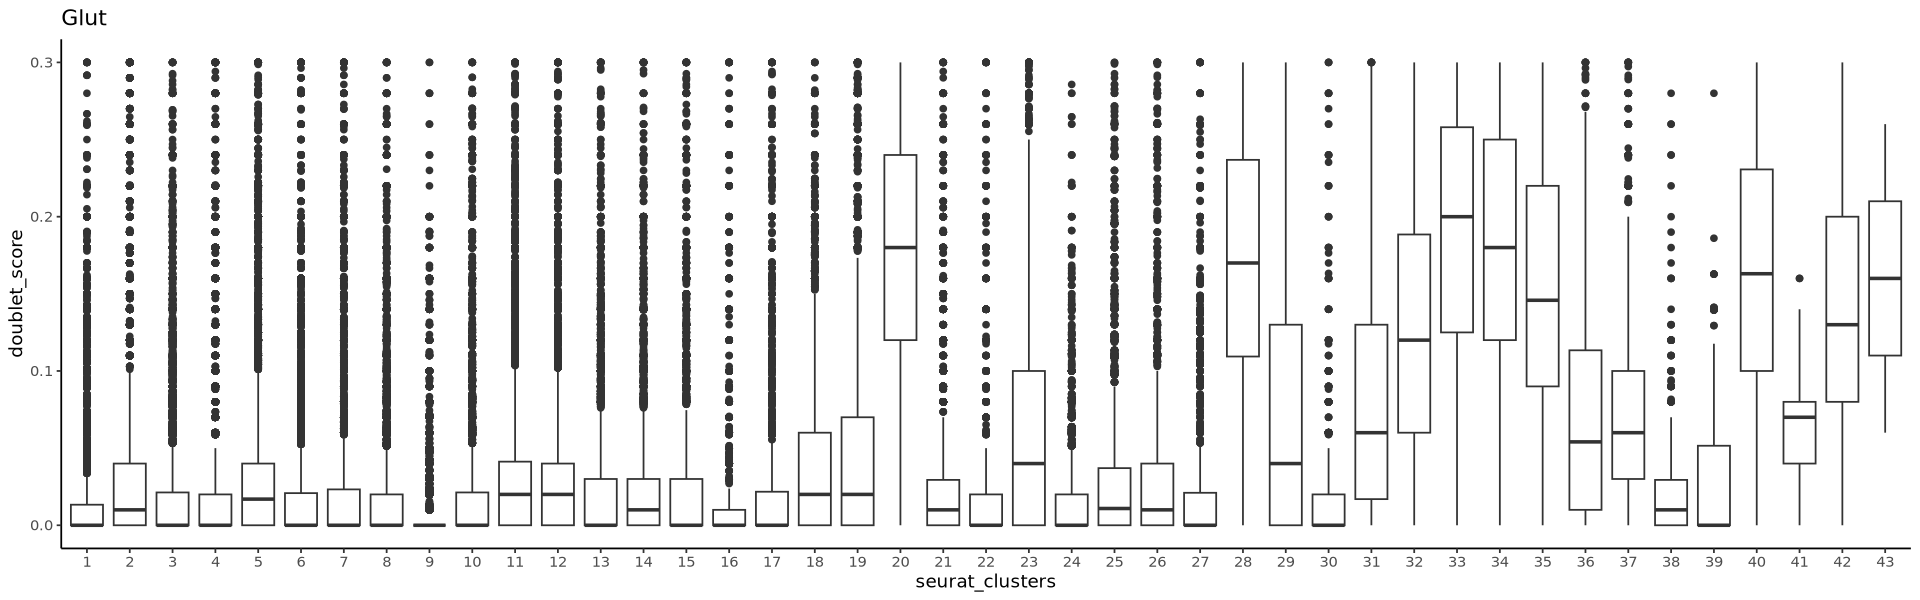

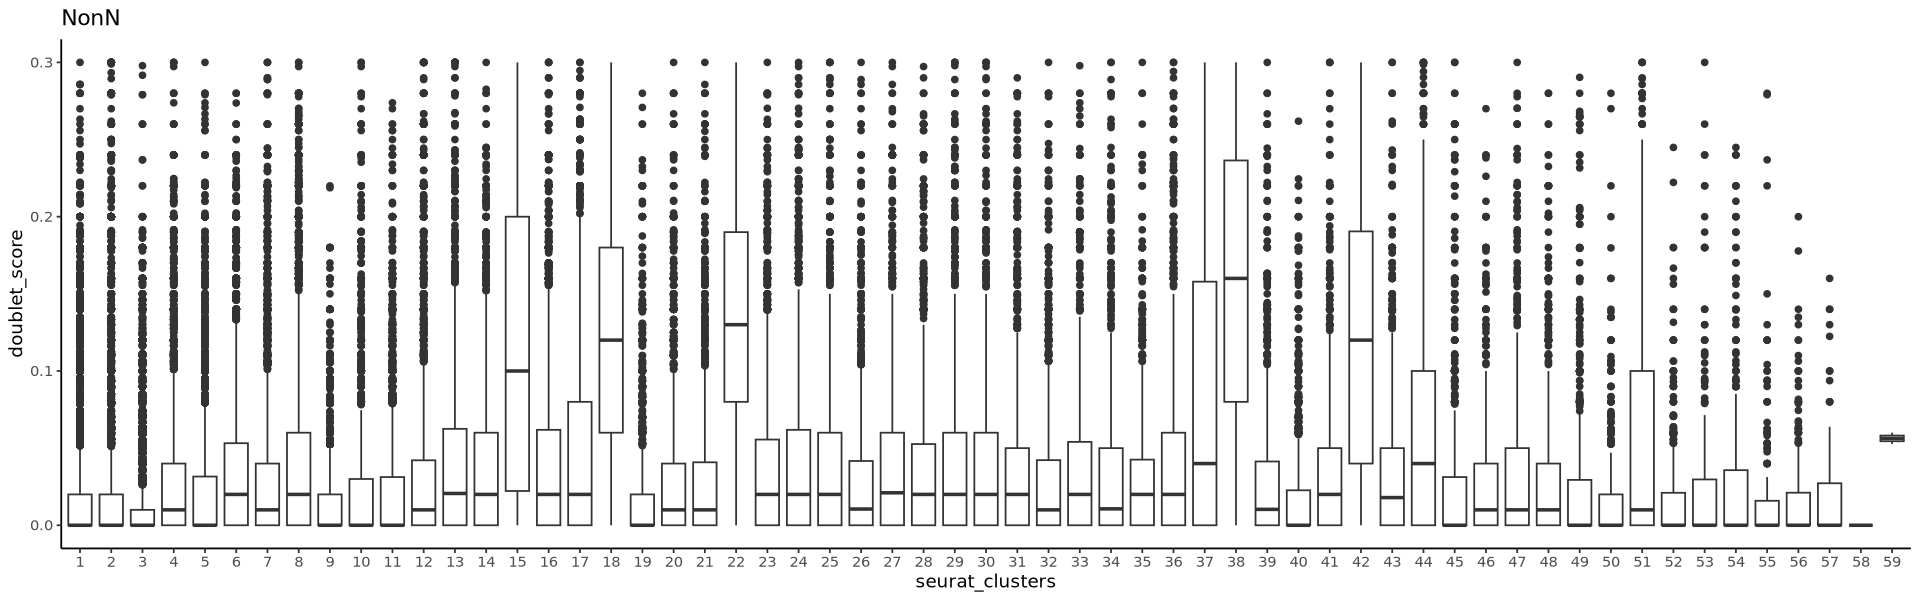

In [10]:
plist <- list()
blist <- list()
for (i in 1:length(mmg_list)){
    tmp <- mmg_list[[i]]
    title <- names(mmg_list)[i]
    plist[[i]] <- tmp@meta.data %>%
    ggplot(aes(x = seurat_clusters, y = doublet_score)) + 
    geom_boxplot() + theme_classic() + ggtitle(title)
    blist[[i]] <- tmp@meta.data %>% group_by(seurat_clusters) %>% 
                  summarise(median_doublet_score = median(doublet_score)) %>%
                  arrange(desc(median_doublet_score)) %>% filter(median_doublet_score > 0.10)
    mmg_list[[i]] <- subset(tmp, subset = seurat_clusters != blist[[i]]$seurat_clusters)
}

options(repr.plot.width = 16, repr.plot.height = 5)
plist

## Visualize marker genes

In [24]:
Glut_set <- c("CUX2", "RORB", "CRH", "CUX1", "KRT17", "TSHZ2")
GABA_set <- c("GAD1", "LAMP5", "VIP", "PVALB", "SST", "SNCG")
NonN_set <- c("PDGFRA", "MAG", "DOCK8", "C1QB", "AQP4", "GFAP")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


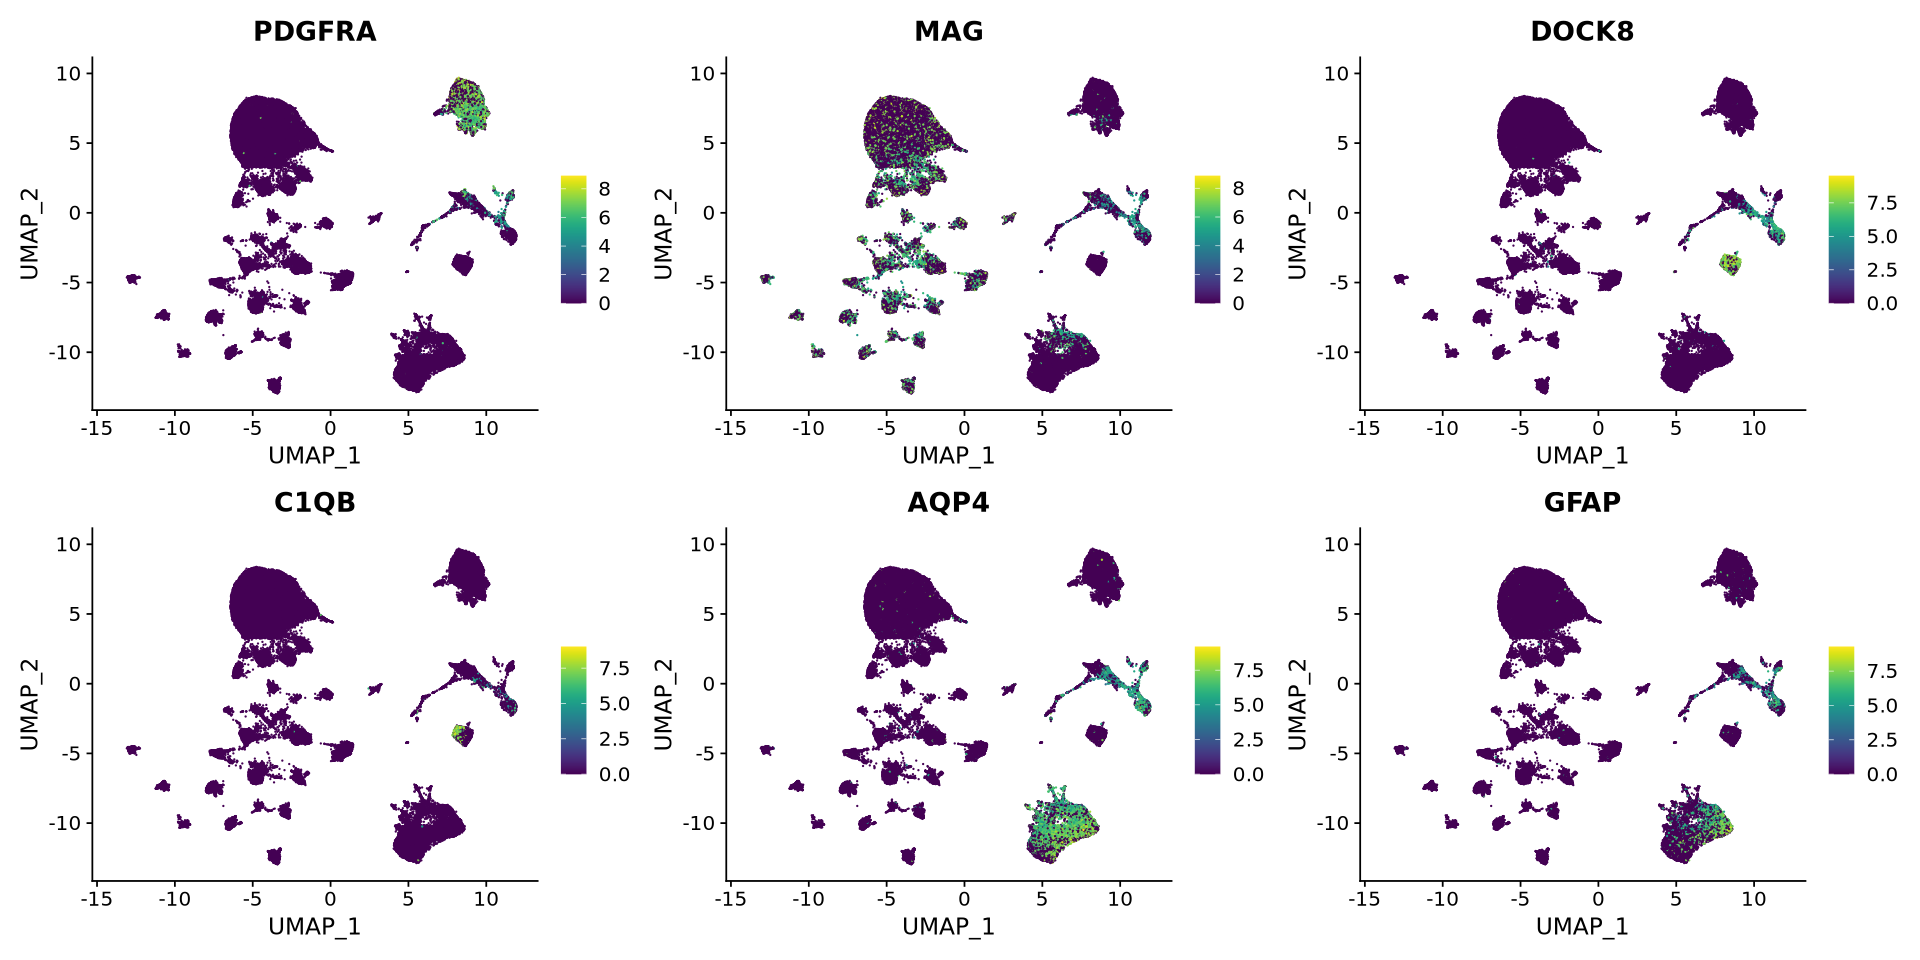

In [30]:
class <- "NonN"
qry <- NonN_set
tmp <- mmg_list[[class]]

options(repr.plot.width = 16, repr.plot.height = 8)
suppressWarnings(FeaturePlot(tmp, qry, ncol = 3, raster = FALSE) & scale_color_viridis())

## Subclass annotation
Two different ways are used to perform annotation:  
(1). enrichment across Siletti marker genes to auto-classify most similar subtypes  
(2). marker gene identification

In [2]:
mmg_list <- list()
for (file in list.files("02.RNA/01.l1_clustering/", pattern = "^MiniAtlas_RNA_merged_cortex_240318_([^_]+)_l1_corrected.qs")){
    fname <- gsub("^MiniAtlas_RNA_merged_cortex_240318_([^_]+)_l1_corrected.qs$", "\\1", file)
    mmg_list[[fname]] <- qs::qread(paste0("02.RNA/01.l1_clustering/", file))
}

gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5595202,298.9,10226042,546.2,5802580,309.9
Vcells,6822905497,52054.7,9722523183,74177.0,6823966562,52062.8


In [3]:
### read Siletti2023Science marker gene, but keep subclasses label only
siletti <- read.csv("/projects/ps-renlab2/y2xie/projects/BICAN/ref/Siletti_marker_all.csv")
siletti <- siletti[grep("cortex", siletti$Top.three.regions), ] %>% filter(Transferred.MTG.Label != "N/A")
mlist <- stringr::str_split(siletti$Top.Enriched.Genes, pattern = ", ")

fmlist <- mlist
names(fmlist) <- siletti$Transferred.MTG.Label
head(fmlist)

$`Micro-PVM`
 [1] "AIF1"    "HLA-DRA" "CD74"    "C1QC"    "C1QB"    "CX3CR1"  "TYROBP" 
 [8] "CSF1R"   "C3"      "APBB1IP"

$`Micro-PVM`
 [1] "LNCAROD" "APBB1IP" "CX3CR1"  "FYB1"    "CSF1R"   "CD74"    "DOCK8"  
 [8] "C3"      "SYK"     "PTPRC"  

$`Micro-PVM`
 [1] "CSF1R"      "CX3CR1"     "APBB1IP"    "FYB1"       "AL392172.1"
 [6] "LINC00996"  "LNCAROD"    "SYK"        "DOCK8"      "C3"        

$`Micro-PVM`
 [1] "MRC1"    "CD163"   "STAB1"   "MS4A6A"  "MS4A4A"  "F13A1"   "SIGLEC1"
 [8] "MS4A4E"  "FCGR2C"  "LILRB5" 

$Endo
 [1] "CLDN5"  "FLT1"   "ABCG2"  "MECOM"  "CD34"   "SMAD6"  "SOX18"  "EPAS1" 
 [9] "SEMA3G" "HLA-E" 

$Endo
 [1] "CLDN5"   "ABCG2"   "FLT1"    "MECOM"   "IFI27"   "TM4SF18" "HLA-E"  
 [8] "CAVIN2"  "FLI1"    "SLC38A5"

## Use ssgsea() to calculate marker gene enrichment

In [5]:
ssgsea

function (X, gene_sets, alpha = 0.25, scale = T, norm = F, single = T) 
{
    row_names = rownames(X)
    num_genes = nrow(X)
    gene_sets = lapply(gene_sets, function(genes) {
        which(row_names %in% genes)
    })
    R = matrixStats::colRanks(X, preserveShape = T, ties.method = "average")
    es = apply(R, 2, function(R_col) {
        gene_ranks = order(R_col, decreasing = TRUE)
        es_sample = sapply(gene_sets, function(gene_set_idx) {
            indicator_pos = gene_ranks %in% gene_set_idx
            indicator_neg = !indicator_pos
            rank_alpha = (R_col[gene_ranks] * indicator_pos)^alpha
            step_cdf_pos = cumsum(rank_alpha)/sum(rank_alpha)
            step_cdf_neg = cumsum(indicator_neg)/sum(indicator_neg)
            step_cdf_diff = step_cdf_pos - step_cdf_neg
            if (scale) 
                step_cdf_diff = step_cdf_diff/num_genes
            if (single) {
                sum(step_cdf_diff)
            }
            else {
                step_cdf_diff[which.max(abs(step_cdf_diff))]
            }
        })
        unlist(es_sample)
    })
    if (length(gene_sets) == 1) 
        es = matrix(es, nrow = 1)
    if (norm) 
        es = es/diff(range(es))
    rownames(es) = names(gene_sets)
    colnames(es) = colnames(X)
    return(es)
}

In [904]:
# ### read Li2023Science marker gene
# li <- read.csv("/projects/ps-renlab2/y2xie/projects/BICAN/ref/yel_Science2023_supp/subclass_marker.txt", sep = "\t")
# li$Cell.subclass <- ifelse(li$Cell.subclass == "", NA, li$Cell.subclass)
# li <- li %>% tidyr::fill(Cell.subclass, .direction = "down")
# lilist <- list()
# for (f in unique(li$Cell.subclass)){
#     lilist[[f]] <- li[li$Cell.subclass == f, "Maker.gene.loci"]
# }

### read Tasic2018Nature marker gene
Tasic <- read.csv("/projects/ps-renlab2/y2xie/projects/BICAN/ref/Tasic2018Nature_mouse_VIS_ALM_marker_gene.csv")
Tasic <- Tasic[na.omit(Tasic$cluster_id), ]
Talist <- stringr::str_split(Tasic$markers_subclass_specific, pattern = ",")
names(Talist) <- Tasic$subclass_label
# mouse to human
for (i in 1:length(Talist)){
    tmp <- convert_mouse_to_human(Talist[[i]], direction = "m2h")
    if (is.null(tmp)) {
        next
    }else{
        Talist[[i]] <- tmp
    }
}
Talist <- Talist[!is.na(Talist)]

### read Hodge2019Nature marker gene
Hodge <- read.csv("/projects/ps-renlab2/y2xie/projects/BICAN/ref/Hodge2019Nature_humanMTG_marker_gene.csv") %>% filter(level4 != "")
Holist <- stringr::str_split(Hodge$level4_markers_vs_all, pattern = ", ")
names(Holist) <- Hodge$level4

### read Siletti2023Science marker gene
siletti <- read.table("../../ref/Siletti_marker.xls", sep = '\t', header = T)
alist <- stringr::str_split(siletti$Top.Enriched.Genes, pattern = ", ")

siletti2 <- siletti %>% # filter(Supercluster %in% c("Cerebellar inhibitory", "CGE interneuron", "LAMP5-LHX6 and Chandelier", "MGE interneuron")) %>%
filter(Transferred.MTG.Label != "N/A")
mlist <- stringr::str_split(siletti2$Top.Enriched.Genes, pattern = ", ")
fmlist <- lapply(mlist, function(genes) {
  genes[genes %in% rownames(expr)]
})
names(fmlist) <- siletti2$Transferred.MTG.Label

sparsity: 0.815351128839831
coarse dgTMatrix into Matrix.
check readSums:  15 
check obj_mtx_collapse:  15 
sparsity: 0.850439537171116
coarse dgTMatrix into Matrix.
check readSums:  16 
check obj_mtx_collapse:  16 
sparsity: 0.700903739727816
coarse dgTMatrix into Matrix.
check readSums:  18 
check obj_mtx_collapse:  18 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



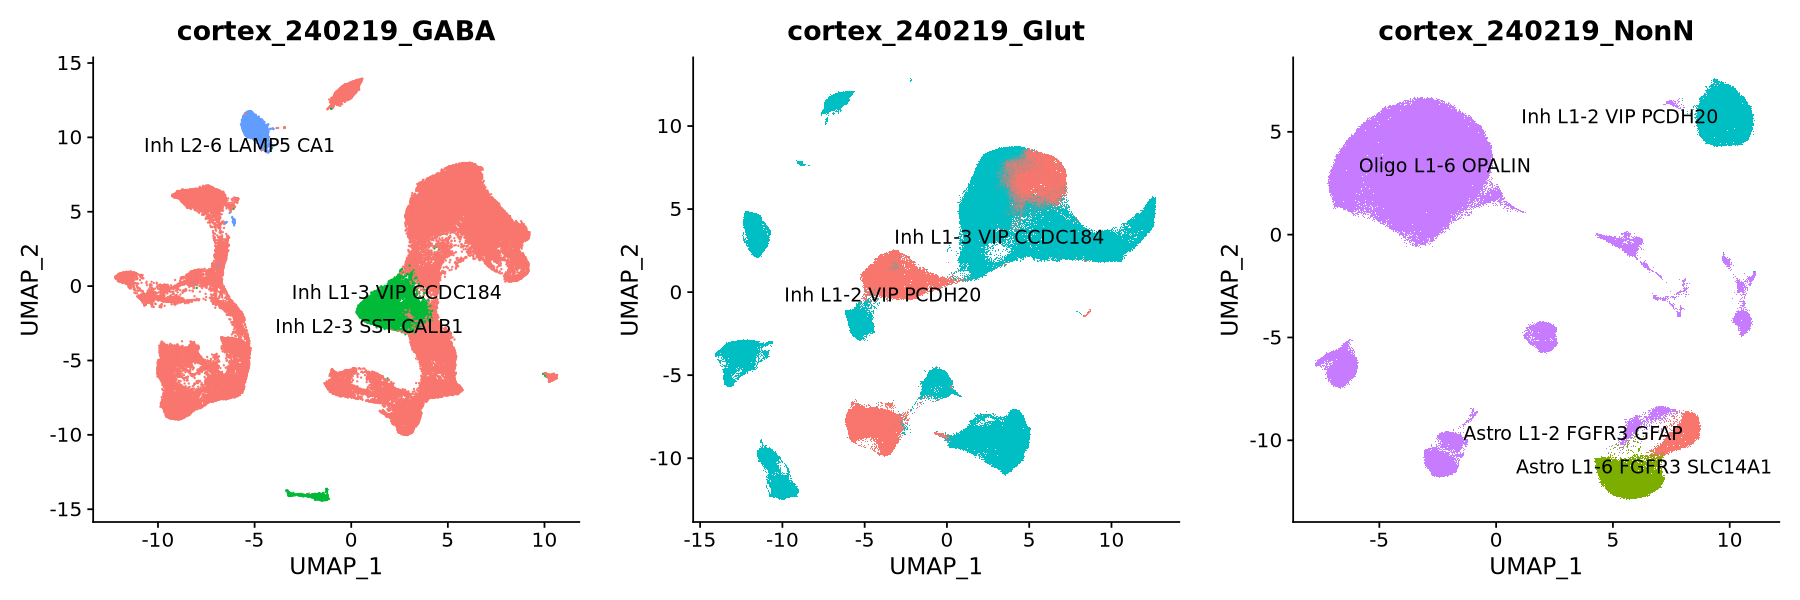

In [969]:
### Calculate enrichment of genes over Hodge2019 label
enris <- list()
annos <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    expr <- ArcXPM(tmp[["RNA"]]@counts, tmp@meta.data, group.by = "seurat_clusters", method = "RPKM", 
               gene_length = "/projects//ps-renlab/y2xie/projects/genome_ref/Paired-Tag/hg38/hg38.gcode.10X.bed")
    expr <- expr[!rowSums(is.na(expr)) > 0, ]
    escore <- ssgsea(X = expr, gene_sets = Holist)
    enris[[name]] <- escore
    annos[[name]] <- data.frame(seurat_clusters = colnames(escore),
                                l2_anno = rownames(escore)[apply(escore, 2, which.max)], 
                                ssgsea = apply(escore, 2, max))
}
saveRDS(enris, "02.RNA/02.l2_clustering/cortex_240219_Hodge2019Nature_marker_ssgsea.rds")

plist <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    l2anno <- annos[[name]]
    tmp$l2_anno_ssgsea <- l2anno[match(tmp$seurat_clusters, l2anno$seurat_clusters), "l2_anno"]
    plist[[name]] <- DimPlot(tmp, group.by = "l2_anno_ssgsea", label = T, repel = T) + NoLegend() + ggtitle(name)
#     obj_list[[name]] <- tmp
}

options(repr.plot.width = 15, repr.plot.height = 5)
do.call(cowplot::plot_grid, c(plist, ncol = 3))

sparsity: 0.815351128839831
coarse dgTMatrix into Matrix.
check readSums:  15 
check obj_mtx_collapse:  15 
sparsity: 0.850439537171116
coarse dgTMatrix into Matrix.
check readSums:  16 
check obj_mtx_collapse:  16 
sparsity: 0.700903739727816
coarse dgTMatrix into Matrix.
check readSums:  18 
check obj_mtx_collapse:  18 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



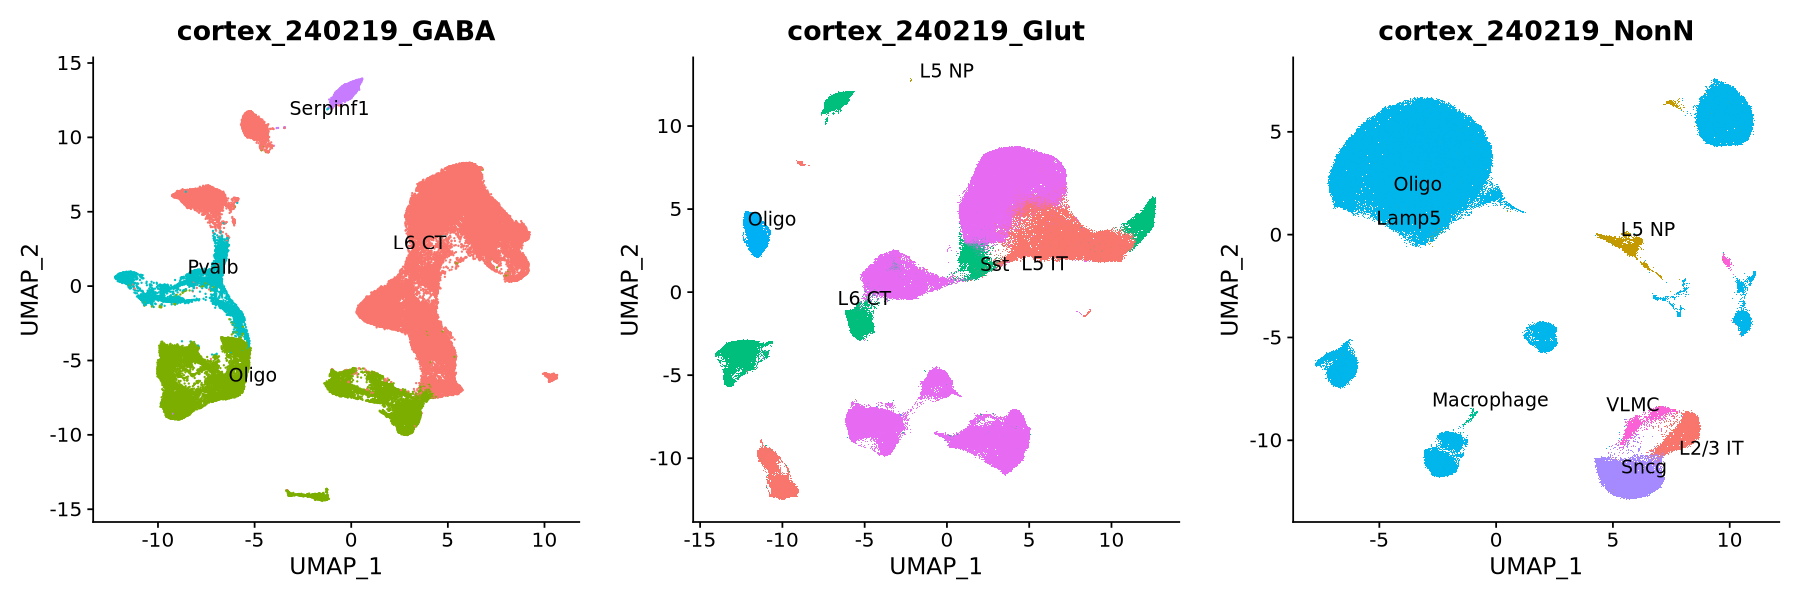

In [970]:
### Calculate enrichment of genes over Tasic2018 label
enris <- list()
annos <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    expr <- ArcXPM(tmp[["RNA"]]@counts, tmp@meta.data, group.by = "seurat_clusters", method = "RPKM", 
               gene_length = "/projects//ps-renlab/y2xie/projects/genome_ref/Paired-Tag/hg38/hg38.gcode.10X.bed")
    expr <- expr[!rowSums(is.na(expr)) > 0, ]
    escore <- ssgsea(X = expr, gene_sets = Talist)
    enris[[name]] <- escore
    annos[[name]] <- data.frame(seurat_clusters = colnames(escore),
                                l2_anno = rownames(escore)[apply(escore, 2, which.max)], 
                                ssgsea = apply(escore, 2, max))
}
saveRDS(enris, "02.RNA/02.l2_clustering/cortex_240219_Tasic2018Nature_marker_ssgsea.rds")

plist <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    l2anno <- annos[[name]]
    tmp$l2_anno_ssgsea <- l2anno[match(tmp$seurat_clusters, l2anno$seurat_clusters), "l2_anno"]
    plist[[name]] <- DimPlot(tmp, group.by = "l2_anno_ssgsea", label = T, repel = T) + NoLegend() + ggtitle(name)
#     obj_list[[name]] <- tmp
}

options(repr.plot.width = 15, repr.plot.height = 5)
do.call(cowplot::plot_grid, c(plist, ncol = 3))

In [471]:
### Calculate enrichment of genes over Siletti MTG label
enris <- list()
annos <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    expr <- ArcXPM(tmp[["RNA"]]@counts, tmp@meta.data, group.by = "seurat_clusters", method = "RPKM", 
               gene_length = "/projects//ps-renlab/y2xie/projects/genome_ref/Paired-Tag/hg38/hg38.gcode.10X.bed")
    expr <- expr[!rowSums(is.na(expr)) > 0, ]
    escore <- ssgsea(X = expr, gene_sets = fmlist)
    enris[[name]] <- escore
    annos[[name]] <- data.frame(seurat_clusters = colnames(escore),
                                l2_anno = rownames(escore)[apply(escore, 2, which.max)], 
                                ssgsea = apply(escore, 2, max))
}
saveRDS(enris, "02.RNA/02.l2_clustering/cortex_240219_siletti_marker_ssgsea.rds")

sparsity: 0.815351128839831
coarse dgTMatrix into Matrix.
check readSums:  15 
check obj_mtx_collapse:  15 
sparsity: 0.850439537171116
coarse dgTMatrix into Matrix.
check readSums:  16 
check obj_mtx_collapse:  16 
sparsity: 0.700903739727816
coarse dgTMatrix into Matrix.
check readSums:  18 
check obj_mtx_collapse:  18 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



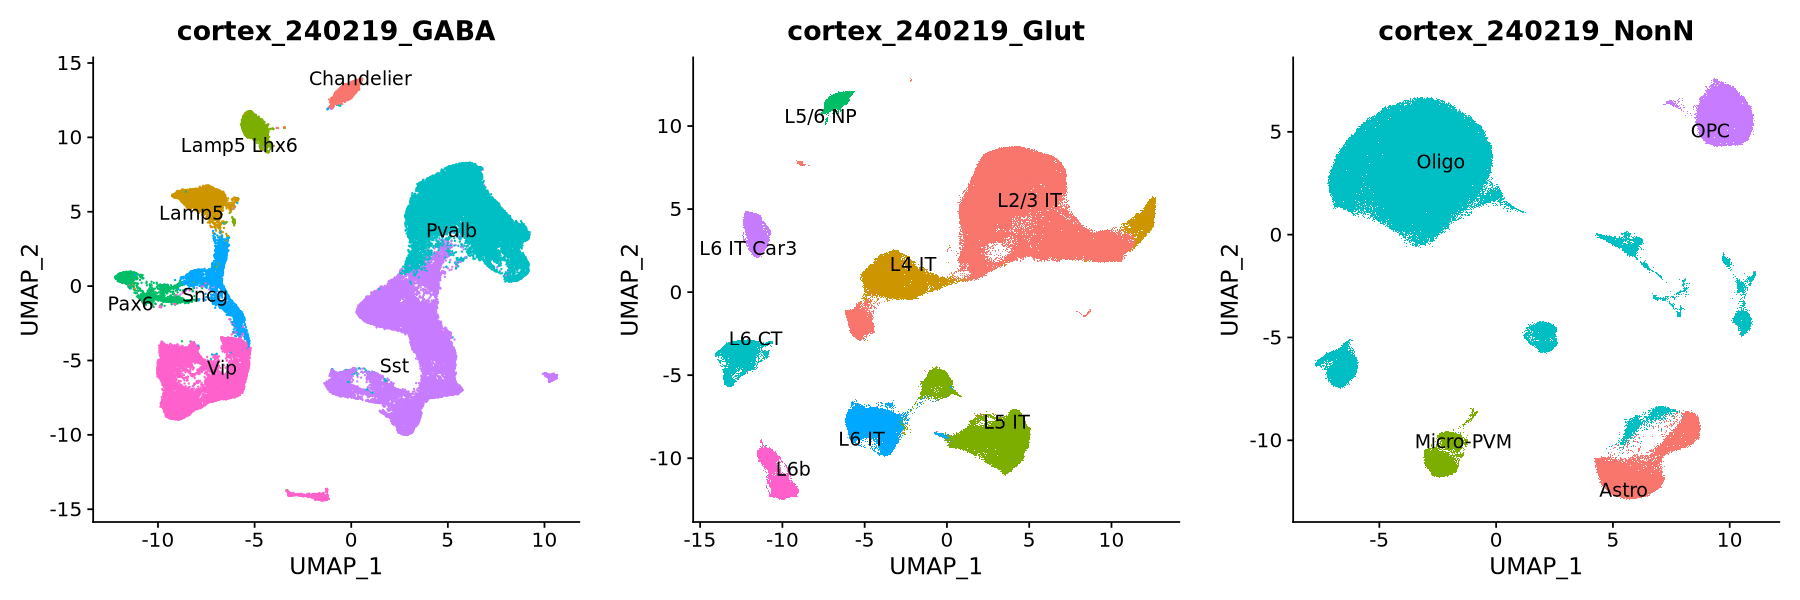

In [476]:
plist <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    l2anno <- annos[[name]]
    tmp$l2_anno_ssgsea <- l2anno[match(tmp$seurat_clusters, l2anno$seurat_clusters), "l2_anno"]
    plist[[name]] <- DimPlot(tmp, group.by = "l2_anno_ssgsea", label = T, repel = T) + NoLegend() + ggtitle(name)
    obj_list[[name]] <- tmp
}

options(repr.plot.width = 15, repr.plot.height = 5)
do.call(cowplot::plot_grid, c(plist, ncol = 3))

## Check marker gene list to validate ssgsea results

### marker genes are called using run.edgeR()

In [9]:
run.edgeR

function (counts, sample, group, prefix, pairwise = FALSE) 
{
    library("edgeR")
    cat("now creating DGE class for edgeR...\n")
    group.list <- factor(sample[, group])
    dge = DGEList(counts = counts, group = group.list, samples = sample)
    keep = filterByExpr(dge)
    dge = dge[keep, , keep.lib.sizes = FALSE]
    dge = calcNormFactors(dge, "TMM")
    design = model.matrix(~0 + group, data = dge$samples)
    colnames(design) <- make.names(gsub(group, "", colnames(design)))
    dge = estimateDisp(dge, trend.method = "locfit", design = design)
    fit = glmFit(dge, design = design)
    cat("now performing glmLRT for individual clusters...\n")
    coef <- unique(group.list)
    for (f in coef) {
        cat(paste0("cluster: ", f, "\n"))
        one_v_rest = c(rep(-1/(length(coef) - 1), times = length(coef)))
        one_v_rest[which(coef == f)] = 1
        vrest = glmLRT(fit, contrast = one_v_rest)
        write.table(topTags(vrest, n = "Inf")$table, file = paste0(prefix, 
            "_edgeR_", f, "_vs_all_groups.xls"), sep = "\t", 
            quote = F)
        cat(paste0("cluster: ", f, " finish.\n"))
        if (pairwise) {
            cat(paste0("Now calculate pairwise test for cluster: ", 
                f, "\n"))
            for (s in coef) {
                if (s == f) {
                  next
                }
                one_v_one = c(rep(0, times = length(coef)))
                one_v_one[which(coef == f)] = 1
                one_v_one[which(coef == s)] = -1
                vtest = glmLRT(fit, contrast = one_v_one)
                write.table(topTags(vtest, n = "Inf")$table, 
                  file = paste0(prefix, "_edgeR_", f, "_vs_", 
                    s, ".xls"), sep = "\t", quote = F)
            }
        }
    }
}

In [491]:
ctx_marker <- list()
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    marker <- list()
    for (f in list.files(path = "02.RNA/02.l2_clustering/01.DE/", pattern = paste0(name, "_.*.xls$"))){
        fname <- gsub(paste0("^", name, "_edgeR_([^_]+)_vs_all_groups.xls$"), "\\1", f)
        tmp <- read.table(paste0("02.RNA/02.l2_clustering/01.DE/", f), header = T) %>% tibble::rownames_to_column("gene")
        tmp$cluster <- fname
        marker[[fname]] <- tmp
    }
    marker <- do.call(rbind, marker)
    ctx_marker[[name]] <- marker
}

In [1143]:
name <- "cortex_240219_NonN"
ccl <- "C6"
rgene <- ctx_marker[[name]] %>% filter(FDR < 0.01 & logCPM > 1) %>% filter(cluster == ccl) %>% slice_max(order_by = logFC, n = 15) 

### Do a filtering based on naive expression pct
pctp <- DotPlot(obj_list[[name]], features = rgene$gene)
frgene <- pctp$data %>% filter(paste0("C", id) == ccl & pct.exp > 10)
frgene %>% arrange(desc(pct.exp)) %>% head

rgene <- rgene[rgene$gene %in% frgene$features.plot, ]
siletti[grep(paste0(rgene$gene, collapse = "|"), siletti$Top.Enriched.Genes), "Transferred.MTG.Label"] %>% table
siletti[grep(paste0(rgene$gene, collapse = "|"), siletti$Top.Enriched.Genes), "Supercluster"] %>% table

,avg.exp,pct.exp,features.plot,id,avg.exp.scaled
,<dbl>,<dbl>,<fct>,<fct>,<dbl>
LINC010995,770.06349,70.76100,LINC01099,6,2.500000
LINC010985,458.89170,53.98330,LINC01098,6,2.500000
GREM15,88.14829,15.54847,GREM1,6,1.792435
LINC020735,103.44318,14.98546,LINC02073,6,1.894292


< table of extent 0 >

< table of extent 0 >

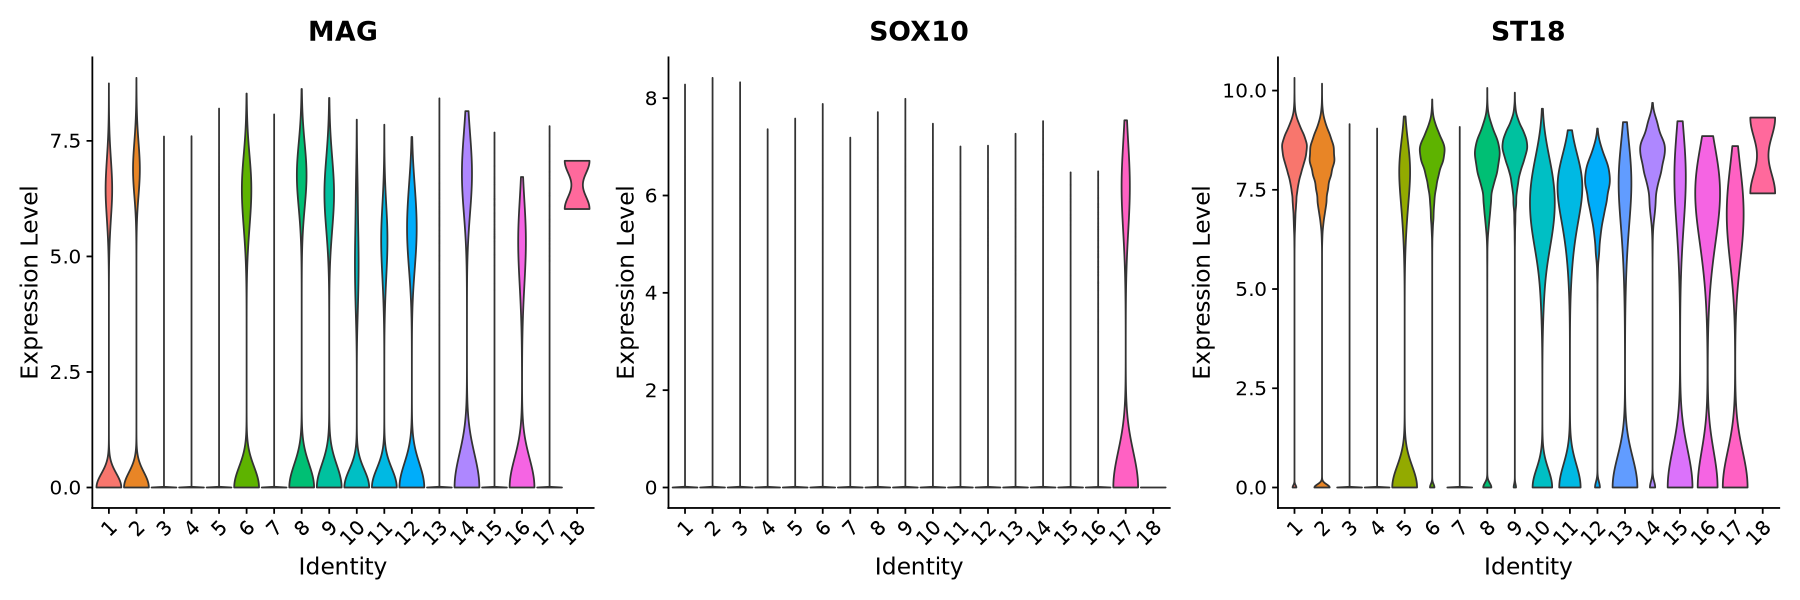

In [1146]:
qgene <- rgene[1:10, "gene"]
options(repr.plot.width = 15, repr.plot.height = 5)
VlnPlot(obj_list[[name]], c('MAG','SOX10','ST18'), pt.size = 0)

In [1116]:
### Check other reference data
Hodge[grep(paste0(rgene$gene, collapse = "|"), Hodge$level4_markers_vs_all), "level3"] %>% table
Hodge[grep(paste0(rgene$gene, collapse = "|"), Hodge$level3_markers_vs_all), "level4"] %>% table

Talist[grep(paste0(rgene$gene, collapse = "|"), Talist)]

< table of extent 0 >

< table of extent 0 >

named list()

In [502]:
# cortex_240219_GABA:
# C1: Pvalb; C2: Pvalb; C3: Sst; C4: Vip; C5: Sst; C6: Vip; C7: Lamp5; C8: Sncg; C9: Sst
# C10: Sst; C11: Lamp5 Lhx6; C12: Pax6; C13: Chandelier; C14: Lamp5
# C15: Sst

# cortex_240219_NonN:
# C1: Oligo C2: Oligo; C3: OPC; C4: Astro; C5: Micro-PVM; C6: Oligo; C7: Astro; C8: Oligo; C9: Oligo
# C10: Oligo/Astro; C11: Micro-PVM; C12: Astro; C13: Endo-VLMC; C14: Oligo
# C15: Micro-PVM; C16: OPC; C17: OPC; C18: Oligo

# cortex_240219_Glut:
# C1: L2/3 IT; C2: VIS IT; C3: L5 IT; C4: L4 IT; C5: L2/3 IT; C6: L6 IT
# C7: L3 IT; C8: L6 CT; C9: L6b; C10: L6 IT Car3; C11: L5 IT; C12: L5/6 NP;
# C13: VIS IT; C14: L5 ET; C15: Pro IT; C16: MTG IT

In [1147]:
### Add l2 annotation
tmp <- obj_list[["cortex_240219_GABA"]]
tmp$l2_anno_manual <- NA
tmp@meta.data[tmp$seurat_clusters %in% c(1, 2), ]$l2_anno_manual <- "Pvalb"
tmp@meta.data[tmp$seurat_clusters %in% c(4, 6), ]$l2_anno_manual <- "Vip"
tmp@meta.data[tmp$seurat_clusters %in% c(3, 5, 9, 10, 15), ]$l2_anno_manual <- "Sst"
tmp@meta.data[tmp$seurat_clusters %in% c(8), ]$l2_anno_manual <- "Sncg"
tmp@meta.data[tmp$seurat_clusters %in% c(7, 14), ]$l2_anno_manual <- "Lamp5"
tmp@meta.data[tmp$seurat_clusters %in% c(11), ]$l2_anno_manual <- "Lamp5 Lhx6"
tmp@meta.data[tmp$seurat_clusters %in% c(12), ]$l2_anno_manual <- "Pax6"
tmp@meta.data[tmp$seurat_clusters %in% c(13), ]$l2_anno_manual <- "Chandelier"
obj_list[["cortex_240219_GABA"]] <- tmp

tmp <- obj_list[["cortex_240219_NonN"]]
tmp$l2_anno_manual <- NA
tmp@meta.data[tmp$seurat_clusters %in% c(1, 2, 6, 8, 9, 14, 18), ]$l2_anno_manual <- "Oligo"
tmp@meta.data[tmp$seurat_clusters %in% c(3, 16, 17), ]$l2_anno_manual <- "OPC"
tmp@meta.data[tmp$seurat_clusters %in% c(6), ]$l2_anno_manual <- "COP"
tmp@meta.data[tmp$seurat_clusters %in% c(4, 7, 12), ]$l2_anno_manual <- "Astro"
tmp@meta.data[tmp$seurat_clusters %in% c(5, 11, 15), ]$l2_anno_manual <- "Micro-PVM"
tmp@meta.data[tmp$seurat_clusters %in% c(10), ]$l2_anno_manual <- "Oligo-Astro"
tmp@meta.data[tmp$seurat_clusters %in% c(13), ]$l2_anno_manual <- "Endo-VLMC"
obj_list[["cortex_240219_NonN"]] <- tmp

tmp <- obj_list[["cortex_240219_Glut"]]
tmp$l2_anno_manual <- NA
tmp@meta.data[tmp$seurat_clusters %in% c(1, 5), ]$l2_anno_manual <- "L2/3 IT"
tmp@meta.data[tmp$seurat_clusters %in% c(2, 13), ]$l2_anno_manual <- "VIS IT"
tmp@meta.data[tmp$seurat_clusters %in% c(3, 11), ]$l2_anno_manual <- "L5 IT"
tmp@meta.data[tmp$seurat_clusters %in% c(4), ]$l2_anno_manual <- "L4 IT"
tmp@meta.data[tmp$seurat_clusters %in% c(6), ]$l2_anno_manual <- "L6 IT"
tmp@meta.data[tmp$seurat_clusters %in% c(7), ]$l2_anno_manual <- "L3 IT"
tmp@meta.data[tmp$seurat_clusters %in% c(8), ]$l2_anno_manual <- "L6 CT"
tmp@meta.data[tmp$seurat_clusters %in% c(9), ]$l2_anno_manual <- "L6b"
tmp@meta.data[tmp$seurat_clusters %in% c(10), ]$l2_anno_manual <- "L6 IT Car3"
tmp@meta.data[tmp$seurat_clusters %in% c(12), ]$l2_anno_manual <- "L5/6 NP"
tmp@meta.data[tmp$seurat_clusters %in% c(14), ]$l2_anno_manual <- "L5 ET"
tmp@meta.data[tmp$seurat_clusters %in% c(15), ]$l2_anno_manual <- "Pro IT"
tmp@meta.data[tmp$seurat_clusters %in% c(16), ]$l2_anno_manual <- "MTG IT"
obj_list[["cortex_240219_Glut"]] <- tmp

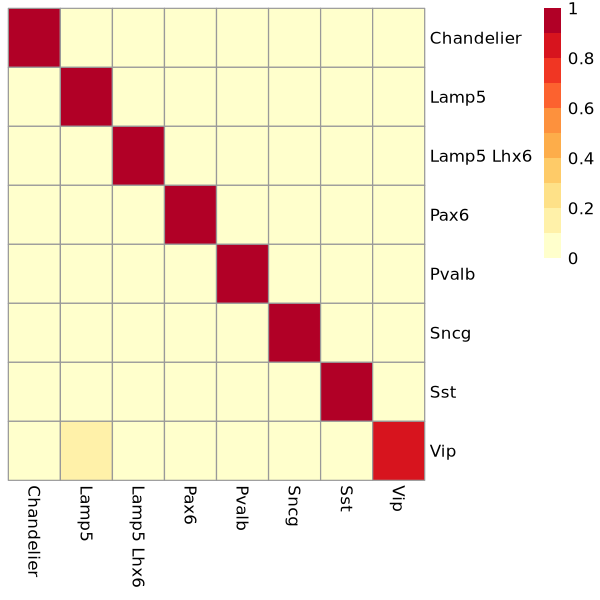

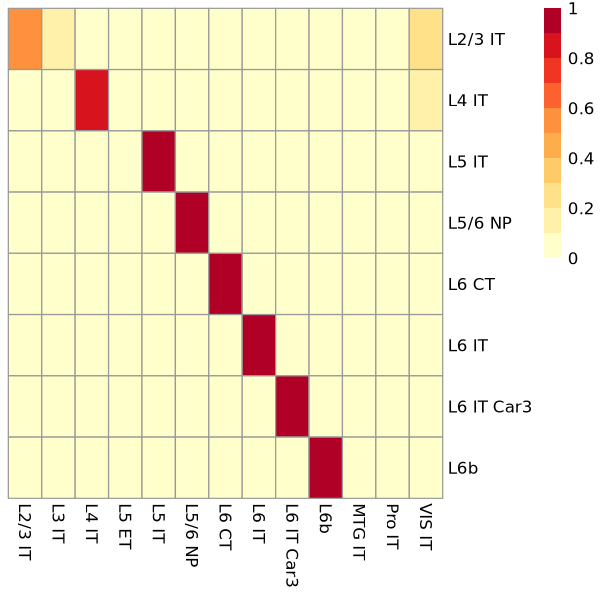

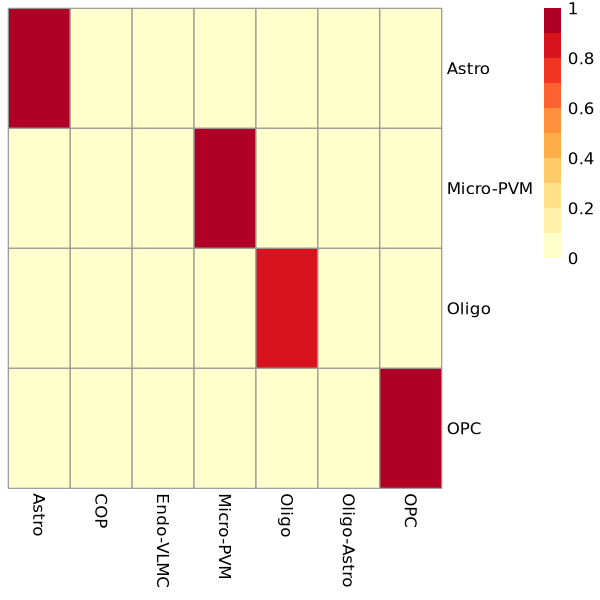

In [1157]:
### Overlap of annotation
plist <- list()
options(repr.plot.width = 5, repr.plot.height = 5)
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    pmat <- tmp@meta.data[,c("l2_anno_ssgsea", "l2_anno_manual")] %>% table  
    rmat <- as.matrix(pmat / rowSums(pmat))
    max_indices <- max.col(rmat)
    permutation_vector <- order(max_indices)
    smat <- rmat[permutation_vector, ]
    plist[[name]] <- smat %>%
    pheatmap::pheatmap(cluster_rows = F, cluster_cols = F, scale = "none",
                       color = colorRampPalette(brewer.pal(n = 8, name = "YlOrRd"))(10))

}

In [1166]:
### Export and split object
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    qs::qsave(obj_list[[name]], paste0("02.RNA/02.l2_clustering/02.seurat_object/MiniAtlas_RNA_merged_", name, "_rmdoublet_l2.qs"), preset = "balanced", nthreads = 32)
}

In [ ]:
for (name in c("cortex_240219_GABA","cortex_240219_Glut","cortex_240219_NonN")){
    tmp <- obj_list[[name]]
    for (f in unique(tmp$l2_anno_manual)){
        tts <- subset(tmp, subset = l2_anno_manual == f)
        f <- sub("/", "-", f)
        f <- sub(" ", "_", f)
        qs::qsave(tts, paste0("02.RNA/03.l3_clustering//02.seurat_object/MiniAtlas_RNA_merged_", name, "_", f, ".qs"), preset = "balanced", nthreads = 32)
    }
}

In [2]:
ls()

character(0)